# Modeling Time

In [1]:
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [3]:
X_test = pd.read_csv("../data/ML_data/X_test.csv", sep = ";")
y_test = pd.read_csv('../data/ML_data/y_test.csv', sep=';', index_col=0)
CT_data = pd.read_csv("../data/ML_data/CT_data.csv", sep=";")
GC_data = pd.read_csv("../data/ML_data/GC_data.csv", sep=";")
TV_data = pd.read_csv("../data/ML_data/TV_data.csv", sep=";")

# Let's start with CT

In [4]:
X_CT = CT_data.drop(['output'], axis=1)
y_CT = CT_data[['output']]

In [5]:
# instantiating the object and fitting
clf_CT = SVC(kernel='linear', C=1, random_state=42).fit(X_CT,y_CT)

# predicting the values
y_pred_CT = clf_CT.predict(X_test)

In [6]:
# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred_CT))

The test accuracy score of SVM is  0.9344262295081968


In [7]:
# instantiating the object
svm_CT = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm_CT, parameters)

# fitting the object
searcher.fit(X_CT, y_CT)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_CT2 = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred_CT2))

The best params are : {'C': 5, 'gamma': 0.0001}
The best score is   : 0.7474871134020619
The test accuracy score of SVM after hyper-parameter tuning is  1.0


In [8]:
# instantiating the object
logreg_CT = LogisticRegression()

# fitting the object
logreg_CT.fit(X_CT, y_CT)

# calculating the probabilities
y_pred_proba = logreg_CT.predict_proba(X_test)

# finding the predicted valued
y_pred_CT3 = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred_CT3))

The test accuracy score of Logistric Regression is  0.9508196721311475


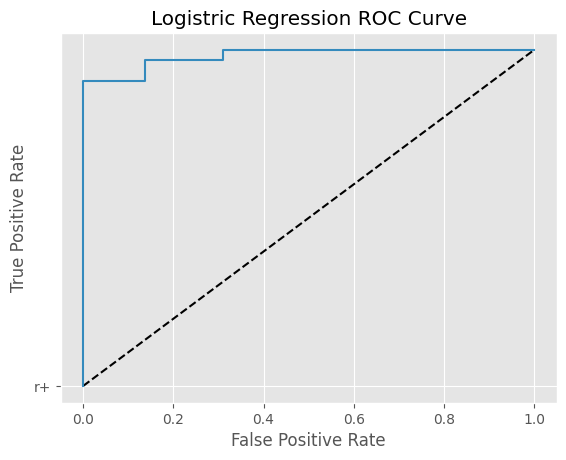

In [9]:
# calculating the probabilities
y_pred_prob_CT = logreg_CT.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr_CT,tpr_CT,threshols_CT=roc_curve(y_test,y_pred_prob_CT)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr_CT,tpr_CT,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

# Let's start with CG

In [11]:
X_GC = GC_data.drop(['output'], axis=1)
y_GC = GC_data[['output']]

In [13]:
# instantiating the object and fitting
clf_GC = SVC(kernel='linear', C=1, random_state=29).fit(X_GC,y_GC)

# predicting the values
y_pred_GC = clf_GC.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred_GC))

The test accuracy score of SVM is  0.9508196721311475


In [14]:
# instantiating the object
svm_GC = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm_GC, parameters)

# fitting the object
searcher.fit(X_GC, y_GC)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_GC2 = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred_GC2))

The best params are : {'C': 1, 'gamma': 0.0005}
The best score is   : 0.7349226804123712
The test accuracy score of SVM after hyper-parameter tuning is  0.9836065573770492


In [15]:
# instantiating the object
logreg_GC = LogisticRegression()

# fitting the object
logreg_GC.fit(X_GC, y_GC)

# calculating the probabilities
y_pred_proba_GC = logreg_GC.predict_proba(X_test)

# finding the predicted valued
y_pred_GC3 = np.argmax(y_pred_proba_GC,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred_GC3))

The test accuracy score of Logistric Regression is  0.9508196721311475


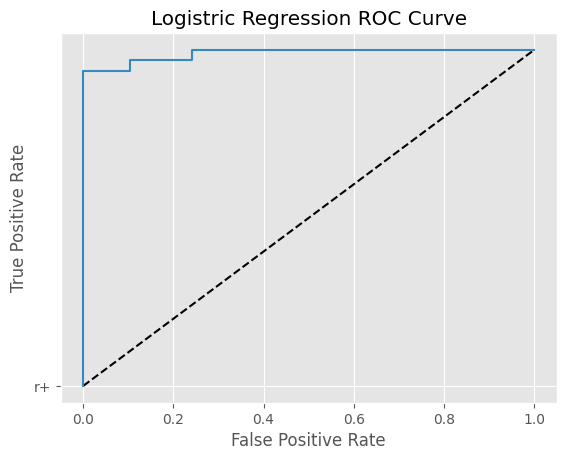

In [16]:
# calculating the probabilities
y_pred_prob_GC = logreg_GC.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr_GC,tpr_GC,threshols_GC = roc_curve(y_test,y_pred_prob_GC)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr_GC,tpr_GC,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

# Keep going with TV

In [17]:
X_TV = TV_data.drop(['output'], axis=1)
y_TV = TV_data[['output']]

In [18]:
# instantiating the object and fitting
clf_TV = SVC(kernel='linear', C=1, random_state=42).fit(X_TV,y_TV)

# predicting the values
y_pred_TV = clf_TV.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred_TV))

The test accuracy score of SVM is  0.9180327868852459


In [19]:
# instantiating the object
svm_TV = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm_TV, parameters)

# fitting the object
searcher.fit(X_TV, y_TV)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_TV2 = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred_TV2))

The best params are : {'C': 9, 'gamma': 0.0001}
The best score is   : 0.7512886597938144
The test accuracy score of SVM after hyper-parameter tuning is  1.0


In [20]:
# instantiating the object
logreg_TV = LogisticRegression()

# fitting the object
logreg_TV.fit(X_TV, y_TV)

# calculating the probabilities
y_pred_proba_TV = logreg_TV.predict_proba(X_test)

# finding the predicted valued
y_pred_TV3 = np.argmax(y_pred_proba_TV,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred_TV3))

The test accuracy score of Logistric Regression is  0.9180327868852459


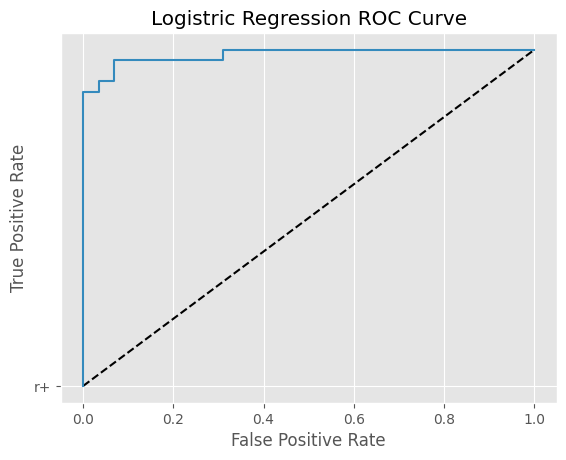

In [21]:
# calculating the probabilities
y_pred_prob_TV = logreg_TV.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr_TV,tpr_TV,threshols_TV=roc_curve(y_test,y_pred_prob_TV)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr_TV,tpr_TV,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

# Super pose ROC curves ?

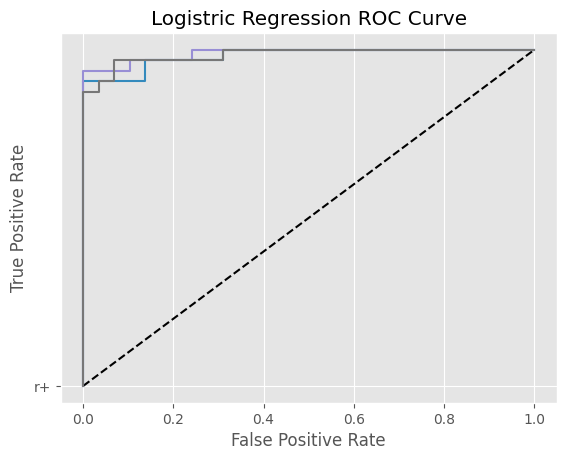

In [22]:
# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr_CT,tpr_CT,label='Logistic Regression')
plt.plot(fpr_GC,tpr_GC,label='Logistic Regression')
plt.plot(fpr_TV,tpr_TV,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

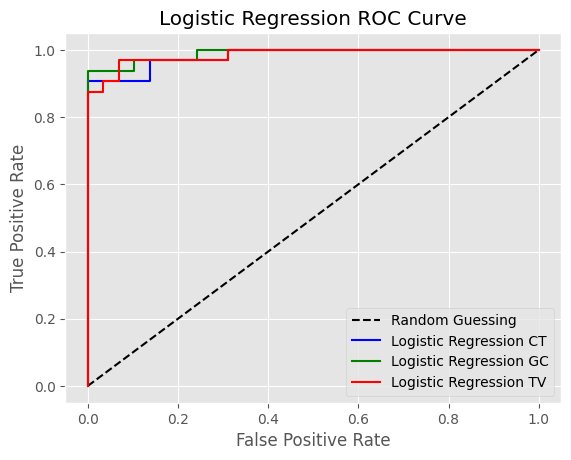

In [25]:
# Assuming fpr_CT, tpr_CT, fpr_GC, tpr_GC, fpr_TV, tpr_TV are defined

# Plotting the curve
plt.plot([0, 1], [0, 1], "k--", label='Random Guessing')

# Plotting the ROC curves for different logistic regression models
plt.plot(fpr_CT, tpr_CT, label='Logistic Regression CT', color='blue')
plt.plot(fpr_GC, tpr_GC, label='Logistic Regression GC', color='green')
plt.plot(fpr_TV, tpr_TV, label='Logistic Regression TV', color='red')

# Adding labels to the axes
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Adding a title to the plot
plt.title("Logistic Regression ROC Curve")

# Adding a legend
plt.legend(loc='lower right')

# Adding grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

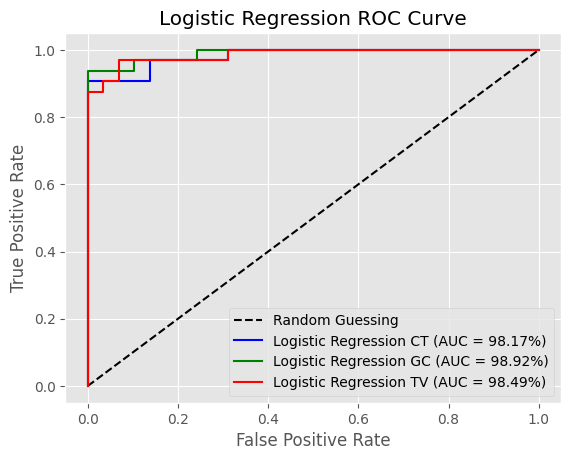

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating the probabilities
y_pred_prob_CT = logreg_CT.predict_proba(X_test)[:, 1]
y_pred_prob_GC = logreg_GC.predict_proba(X_test)[:, 1]
y_pred_prob_TV = logreg_TV.predict_proba(X_test)[:, 1]

# Calculating FPR, TPR, and thresholds for each model
fpr_CT, tpr_CT, thresholds_CT = roc_curve(y_test, y_pred_prob_CT)
auc_CT = roc_auc_score(y_test, y_pred_prob_CT) * 100

fpr_GC, tpr_GC, thresholds_GC = roc_curve(y_test, y_pred_prob_GC)
auc_GC = roc_auc_score(y_test, y_pred_prob_GC) * 100

fpr_TV, tpr_TV, thresholds_TV = roc_curve(y_test, y_pred_prob_TV)
auc_TV = roc_auc_score(y_test, y_pred_prob_TV) * 100

# Plotting the ROC curves
plt.plot([0, 1], [0, 1], "k--", label='Random Guessing')

plt.plot(fpr_CT, tpr_CT, label=f'Logistic Regression CT (AUC = {auc_CT:.2f}%)', color='blue')
plt.plot(fpr_GC, tpr_GC, label=f'Logistic Regression GC (AUC = {auc_GC:.2f}%)', color='green')
plt.plot(fpr_TV, tpr_TV, label=f'Logistic Regression TV (AUC = {auc_TV:.2f}%)', color='red')

# Adding labels to the axes
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Adding a title to the plot
plt.title("Logistic Regression ROC Curve")

# Adding a legend
plt.legend(loc='lower right')

# Adding grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()


Overfitting ??